
# 项目：TMDB 电影数据集调查报告

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介

> **提示**：本数据集中包含 1 万条电影信息，信息来源为“电影数据库”（TMDb，The Movie Database），包括用户评分和票房。
本报告会通过对原数据集进行评估、清洗及探索，以试图回答以下问题：

Q1:最近几年最受欢迎的电影类别是哪些？
Q2:评分高的电影有什么特点？
Q3:票房高的电影有哪些特点？（如：电影评分和收入是否是正相关关系？）

声明：由于本报告只是基于现有的已收录信息进行分析，没有使用推论统计或机器学习，因此本报告结论只是暂时的，可能会随之后样本数量增加而不断优化调整。

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

Movie_data=pd.read_csv('tmdb-movies.csv')

<a id='wrangling'></a>
## 数据整理

> **说明**：在报告的这一部分中载入数据，检查数据结构，简洁度，然后整理和清理数据集，以便进行分析。

### 常规属性

In [4]:
Movie_data.shape

(10866, 21)

In [5]:
# 加载数据并打印几行。进行这几项操作，来检查数据
#   类型，以及是否有缺失数据或错误数据的情况。
Movie_data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


> **说明**：本数据集包含超过1万条电影信息，除电影上映时间外，还包含了主演，类型，内容关键词，导演，出品公司等语义类信息，以及评分、预算、票房收入等数值类信息，我们可以基于数值变量之间的交叉分析，探索如评分和预算、票房之间的关系，也可以基于数值和语义之间的交叉分析，探索电影的导演、类型、内容关键词是否会对电影的评分、票房产生影响。


### 评估数据(处理空缺、重复、错误数据)

In [6]:
Movie_data.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
# 在讨论数据结构和需要解决的任何问题之后，
#   在本部分的第二小部分进行这些清理步骤。
Movie_data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [8]:
Movie_data.duplicated().sum()

1

> **说明**：
1.数据集一共包含10866个样本，其中比较重要的指标，如电影名称，预算，评分，类型，票房等都是完整的，除了少量录入错误外，我们只需要删去重复行，即可对问题1&2 开始分析，而问题3 涉及到的语义相关分析，只能局限于信息较完整的样本中。
2.budget_adj,revenue_adj 分别是基于原预算、票房金额的调整值，也更加精确，因此我们将忽略budget,revenue 两列，以调整值budget_adj,revenue_adj 为准。


In [9]:
Movie_data.drop_duplicates(inplace=True)

<a id='eda'></a>
## 研究问题1：12-15年每年最受欢迎的电影类别是哪些？


In [10]:
Movie_data.groupby('release_year').apply(lambda grp: grp.nlargest(1,'revenue_adj'))

,,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
release_year,,,,,,,,,,,,,,,,,,,,,,
1960,10143,967,tt0054331,1.136943,12000000,60000000,Spartacus,Kirk Douglas|Laurence Olivier|Jean Simmons|Cha...,NaN,Stanley Kubrick,More titanic than any story ever told!,...,Spartacus is a 1960 American historical drama ...,197,Action|Drama|History,Bryna Productions,10/6/60,211,6.9,1960,8.847561e+07,4.423780e+08
1961,10110,12230,tt0055254,2.631987,4000000,215880014,One Hundred and One Dalmatians,Rod Taylor|J. Pat O'Malley|Betty Lou Gerson|Ma...,NaN,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,The Canine Caper of the Century,...,When a litter of dalmatian puppies are abducte...,79,Adventure|Animation|Comedy|Family,Walt Disney Productions,1/25/61,913,6.6,1961,2.917944e+07,1.574815e+09
1962,9850,947,tt0056172,1.168767,15000000,70000000,Lawrence of Arabia,Peter O'Toole|Alec Guinness|Anthony Quinn|Jack...,NaN,David Lean,A Mighty Motion Picture Of Action And Adventure!,...,An epic about British officer T.E. Lawrence's ...,216,Adventure|Drama|History|War,Horizon Pictures (II),12/10/62,517,7.5,1962,1.081267e+08,5.045914e+08
1963,10438,657,tt0057076,2.508235,2500000,78898765,From Russia With Love,Sean Connery|Daniela Bianchi|Lotte Lenya|Rober...,http://www.mgm.com/view/movie/717/From-Russia-...,Terence Young,The world's masters of murder pull out all the...,...,Agent 007 is back in the second installment of...,115,Action|Thriller|Adventure,Eon Productions|Metro-Goldwyn-Mayer (MGM)|Danjaq,10/11/63,458,6.7,1963,1.780045e+07,5.617734e+08
1964,9881,658,tt0058150,3.153791,3500000,124900000,Goldfinger,Sean Connery|Honor Blackman|Gert FrÃ¶be|Shirle...,http://www.mgm.com/view/movie/760/Goldfinger/,Guy Hamilton,Everything he touches turns into excitement!,...,Special agent 007 (Sean Connery) comes face to...,110,Adventure|Action|Thriller,Eon Productions|Metro-Goldwyn-Mayer (MGM),9/17/64,602,7.0,1964,2.460594e+07,8.780804e+08
1965,10690,15121,tt0059742,1.313676,8200000,163214286,The Sound of Music,Julie Andrews|Christopher Plummer|Eleanor Park...,NaN,Robert Wise,The happiest sound in all the world!,...,Film adaptation of a classic Rodgers and Hamme...,174,Drama|Family|Music|Romance,Robert Wise Productions|Argyle Enterprises,3/2/65,620,7.2,1965,5.674862e+07,1.129535e+09
1966,10822,396,tt0061184,0.670274,7500000,33736689,Who's Afraid of Virginia Woolf?,Elizabeth Taylor|Richard Burton|George Segal|S...,NaN,Mike Nichols,You are cordially invited to George and Martha...,...,Mike Nicholsâ€™ film from Edward Albee's play ...,131,Drama,Chenault Productions,6/21/66,74,7.5,1966,5.038511e+07,2.266436e+08
1967,10398,9325,tt0061852,2.550704,4000000,205843612,The Jungle Book,Phil Harris|Sebastian Cabot|Louis Prima|George...,NaN,Wolfgang Reitherman,The Jungle is JUMPIN'!,...,The Jungle Book follows the ups and downs of t...,78,Family|Animation|Adventure,Walt Disney Pictures,10/18/67,928,7.0,1967,2.614705e+07,1.345551e+09
1968,9719,62,tt0062622,3.309196,12000000,56715371,2001: A Space Odyssey,Keir Dullea|Douglas Rain|Gary Lockwood|William...,NaN,Stanley Kubrick,An epic drama of adventure and exploration,...,Humanity finds a mysterious object buried bene...,149,Science Fiction|Mystery|Adventure,Stanley Kubrick Productions|Metro-Goldwyn-Maye...,4/5/68,1708,7.7,1968,7.522756e+07,3.555466e+08


> **结论**：从近5年(2011-2015年)来看，收入最高的电影类型中，均包含adventure，可见冒险类电影仅几年的票房收入倾向于更好

<a id='eda'></a>
## 研究问题2：评分高的电影都有什么特点？

In [11]:
# 基于5数概括法，基于不同电影评分，把电影等级分为A(前25%)，B（25%-50%），C（50%-75%）,D(75%-100%) 四档
bin_edges=[1.5,5.4,6.0,6.6,9.2]
bin_names=['D','C','B','A']
# 创建电影ranking 列，并且只看评分最高(A)的电影
Movie_data['ranking']=pd.cut(Movie_data['vote_average'],bin_edges,labels=bin_names)
Movie_A=Movie_data.query('ranking=="A"')
Movie_A['director'].value_counts()[:5]

Martin Scorsese     22
Clint Eastwood      18
Steven Spielberg    18
Woody Allen         17
Wes Anderson        12
Name: director, dtype: int64

Text(0,0.5,'Frequency(1960-2015)')

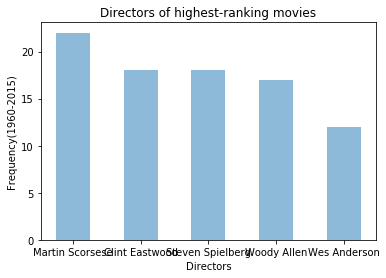

In [12]:
plt.bar(['Martin Scorsese','Clint Eastwood','Steven Spielberg','Woody Allen','Wes Anderson'],[22,18,18,17,12],alpha=0.5,width=0.5);
plt.title('Directors of highest-ranking movies')
plt.xlabel('Directors')
plt.ylabel('Frequency(1960-2015)')

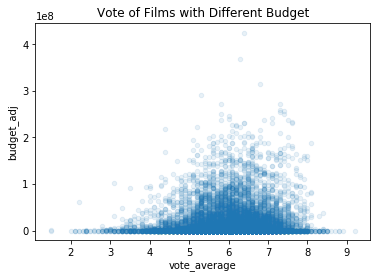

In [16]:
Movie_data.plot(kind='scatter',x='vote_average',y='budget_adj',alpha=0.1,title='Vote of Films with Different Budget');

> **结论**：近40年的高评分电影中，较多为导演Martin Scorsese 拍摄。
随电影投资（budget）增加，观众的电影评分呈现上升趋势，但主要集中在6-8分，8-9分的高评分电影，投资不一定非常高，其也和导演能力等因素有关。

<a id='eda'></a>
## 研究问题3：票房高的电影都有什么特点？

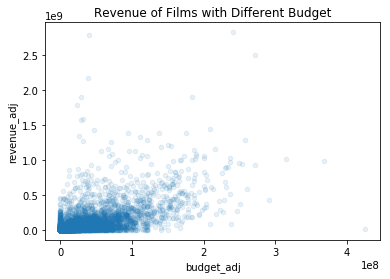

In [17]:
# 尝试探索不同票房的电影和投资预算（budget）的关系
Movie_data.plot(kind='scatter',x='budget_adj',y='revenue_adj',alpha=0.1,title='Revenue of Films with Different Budget');

<a id='conclusions'></a>
## 结论
随着投入预算的增加，电影票房也会随之相应增加，但趋势相关性在预算到达一定级别（1亿美元）后，才较为明显。

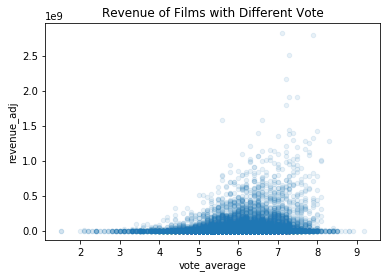

In [19]:
# 尝试探索不同票房的电影和评分的关系
Movie_data.plot(kind='scatter',x='vote_average',y='revenue_adj',alpha=0.1,title='Revenue of Films with Different Vote');

<a id='conclusions'></a>
## 结论

评分较高的电影，票房收入也会相应有所上升

In [105]:
# 观察票房收入在前25%的电影和导演的关系
Movie_B=Movie_data.query('revenue_adj>=3.369710e+07')
Movie_B['director'].value_counts()[:5]

Steven Spielberg    27
Clint Eastwood      25
Ron Howard          18
Ridley Scott        18
Robert Zemeckis     14
Name: director, dtype: int64

Text(0,0.5,'Revenue(1960-2015)')

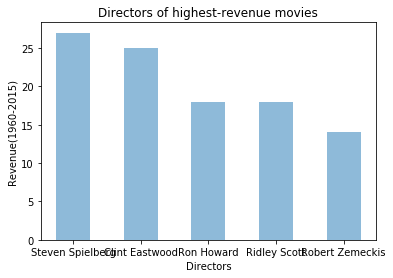

In [106]:
plt.bar(['Steven Spielberg','Clint Eastwood','Ron Howard','Ridley Scott','Robert Zemeckis'],[27,25,18,18,14],alpha=0.5,width=0.5);
plt.title('Directors of highest-revenue movies')
plt.xlabel('Directors')
plt.ylabel('Revenue(1960-2015)')

<a id='conclusions'></a>
## 结论
从对高票房电影的导演分析来看，Steven Spielberg,Clint Eastwood，作为高票房导演，其高评分的电影数量也在Top 5，说明其作品可以做到既叫好又叫座。

<a id='conclusions'></a>
## 结论局限性说明
本次分析尽量选取了缺失值较少的revenue(收入)，budget(预算)，director（导演）来做分析，但数据的准确性会对分析结果产生影响，如电影公司在上映前，雇佣水军刷电影评分，可能会出现部分电影评分极高，但票房偏低的情况，因而可能降低电影实际评分和票房的正相关性。
另，由于样本数占电影总数量比例未知，样本的推算数据，也可能因样本率较低而无法准确反映总体情况(如主流导演Steven Spielberg电影的收录量，可能比部分类型片导演电影的收录更全，那样本推算数据，可能更多反映的是主流商业影片的特征，不适用于对部分相对小众类型片的推测)
因此以上推断结果，仅仅为试探性，有待样本数据进一步准确及丰富后，再做进一步的完善。

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])